In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [133]:
pd.set_option("display.max_columns",None)
pd.set_option("display.width",1000)
pd.set_option("display.max_rows",None)

In [363]:
train=pd.read_csv("train_housing.csv")
test=pd.read_csv("test_housing.csv")

In [52]:
missing_values=train.isnull().sum()
print(missing_values)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [53]:
missing_values_filtered = missing_values[missing_values > 0]
print(missing_values_filtered)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [54]:
dtypes_df = pd.DataFrame({'Column': train.columns, 'DataType': train.dtypes})
print(dtypes_df)

                      Column DataType
Id                        Id    int64
MSSubClass        MSSubClass    int64
MSZoning            MSZoning   object
LotFrontage      LotFrontage  float64
LotArea              LotArea    int64
...                      ...      ...
MoSold                MoSold    int64
YrSold                YrSold    int64
SaleType            SaleType   object
SaleCondition  SaleCondition   object
SalePrice          SalePrice    int64

[81 rows x 2 columns]


In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [56]:
train.dropna(subset=["Electrical"],inplace=True)

In [57]:
for col in train.columns:
    if train[col].dtype=="object":
        train[col].fillna("None",inplace=True)

In [61]:
missing_values=train.isnull().sum()
missing_values_filtered = missing_values[missing_values > 0]
print(missing_values_filtered)

Series([], dtype: int64)


In [59]:
train['GarageYrBlt'].fillna(0, inplace=True)

In [60]:
for col in train.columns:
    if train[col].dtype=="float64":
        train[col].fillna("0",inplace=True)

In [62]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


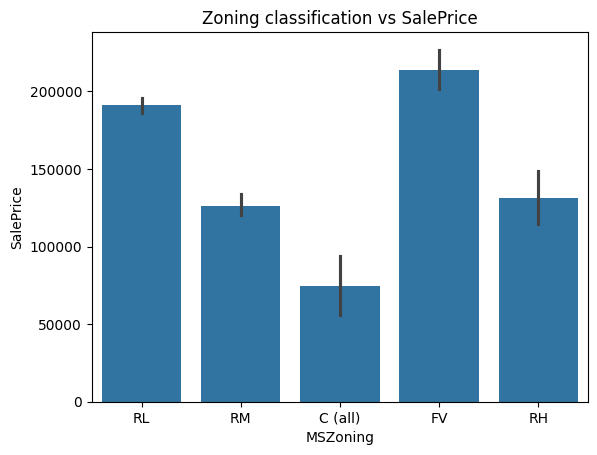

In [67]:
sns.barplot(data=train,x="MSZoning",y="SalePrice")
plt.title("Zoning classification vs SalePrice")
plt.show()

so saleprice seems to be high in the Floating Village Residential but is it because the houses sold there are more or the average sale price is high ??Lets take a look 

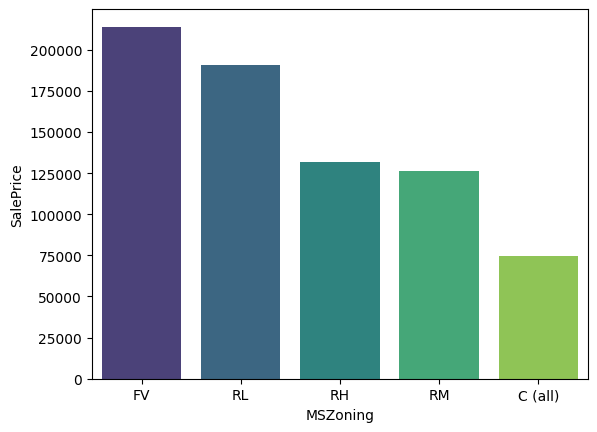

In [72]:
avg_sale_price = train.groupby('MSZoning')['SalePrice'].mean().sort_values(ascending=False)
sns.barplot(data=avg_sale_price,palette="viridis")
plt.show()

Yes, FV does seem to have the highest sale price on average compared to other zoning categories. This means the higher average SalePrice for FV is not just due to more houses being sold, but rather the houses in this zoning classification tend to be more expensive

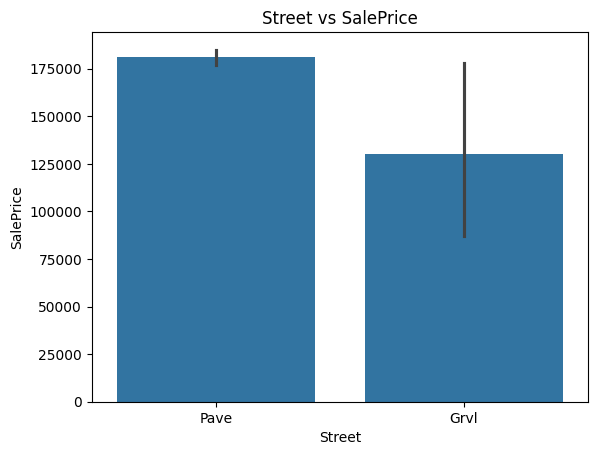

In [79]:
sns.barplot(data=train,x="Street",y="SalePrice") 
plt.title("Street vs SalePrice")
plt.show()

So it seems the Sales price seems to lie more on than paved streets

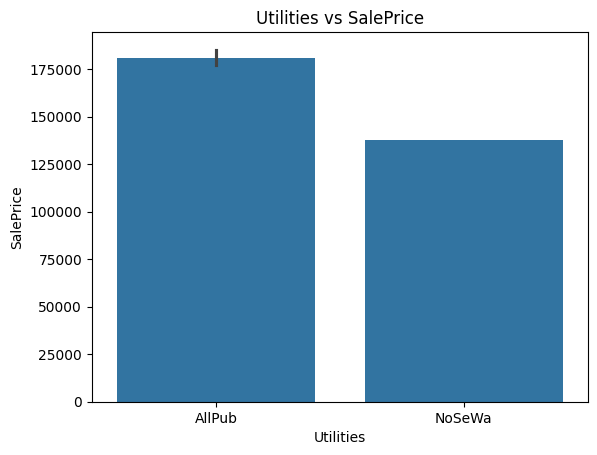

In [83]:
sns.barplot(data=train,x="Utilities",y="SalePrice") 
plt.title("Utilities vs SalePrice")
plt.show()

so houses with more public Utilities have a higher salePrice than the Electricity and Gas Only houses have

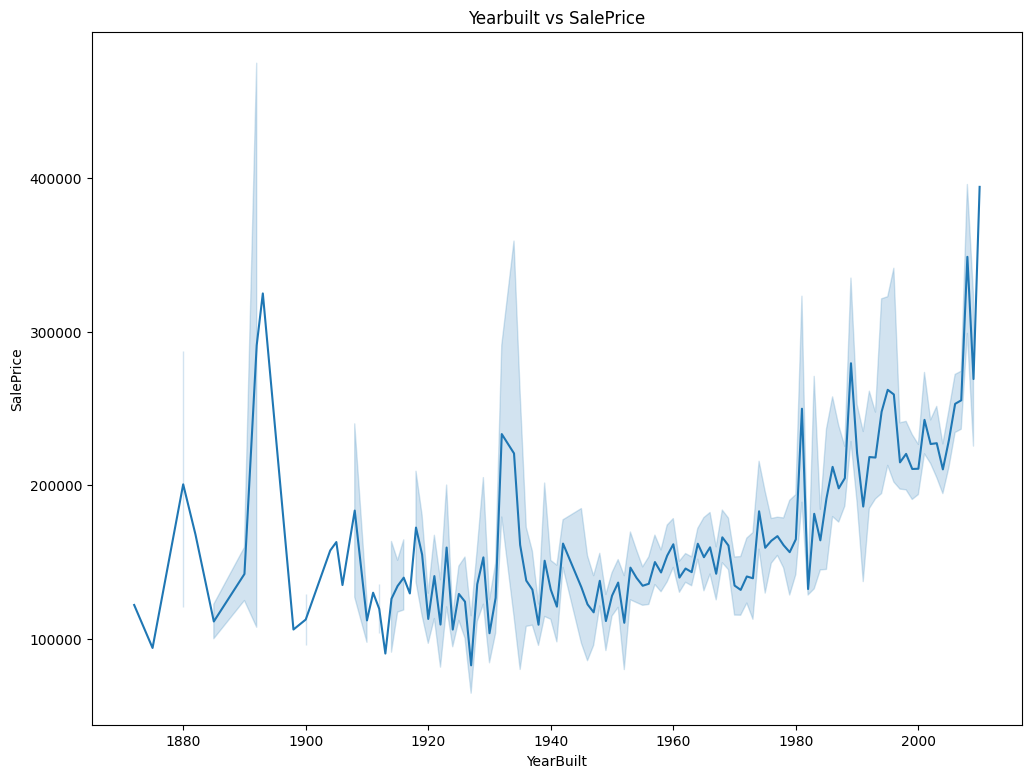

In [86]:
plt.figure(figsize=(12,9))
sns.lineplot(data=train,x="YearBuilt",y="SalePrice",palette="magma") 
plt.title("Yearbuilt vs SalePrice")
plt.show()

so it Seems houses from 1990 have a higher sales price than any other with an exception 1890-1895

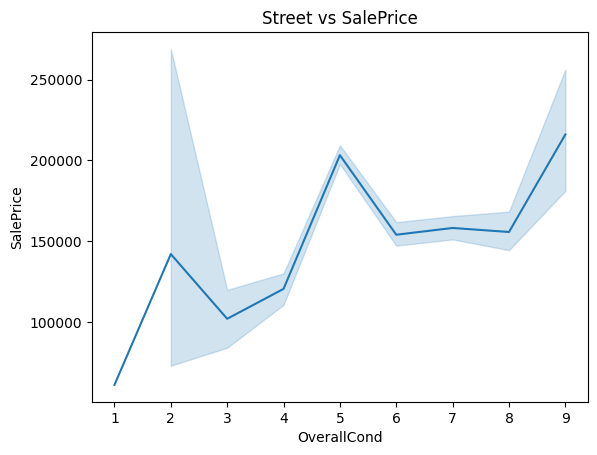

In [87]:
sns.lineplot(data=train,x="OverallCond",y="SalePrice") 
plt.title("Street vs SalePrice")
plt.show()

the better the OverallConditions the higher the condition but its seems it has little to no effect on the Saleprice

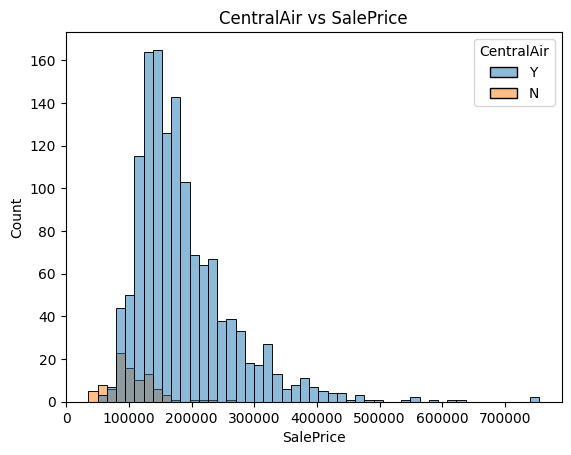

In [107]:
sns.histplot(data=train,hue="CentralAir",x="SalePrice") 
plt.title("CentralAir vs SalePrice")
plt.show()

So the CentralAir highly affects the SalesPrice when the CentralAir is Y the price tends to rise

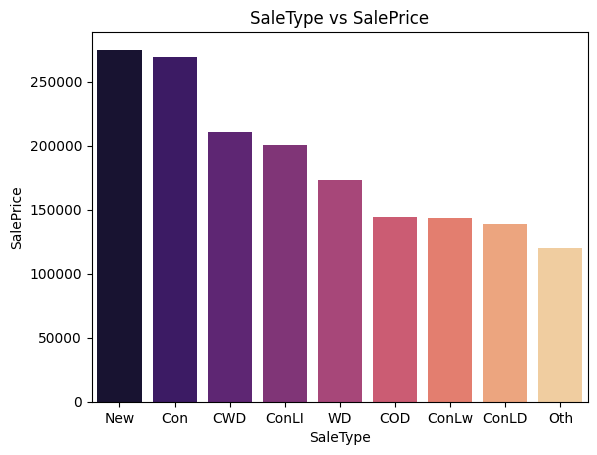

In [93]:
saletype = train.groupby('SaleType')['SalePrice'].mean().sort_values(ascending=False)
sns.barplot(data=saletype,palette="magma") 
plt.title("SaleType vs SalePrice")
plt.show()

so all the saletype realy doesn't make much difference but the New-Home just constructed and sold and Con-Contract 15% Down payment regular terms seem to have higher sales 

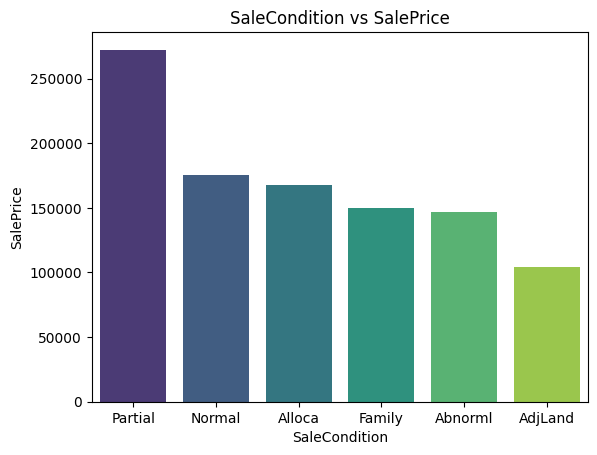

In [105]:
salecond = train.groupby('SaleCondition')['SalePrice'].mean().sort_values(ascending=False)
sns.barplot(data=salecond,palette="viridis") 
plt.title("SaleCondition vs SalePrice")
plt.show()

so when the sale conditions are Partial then the sale Price is high but the others are normal

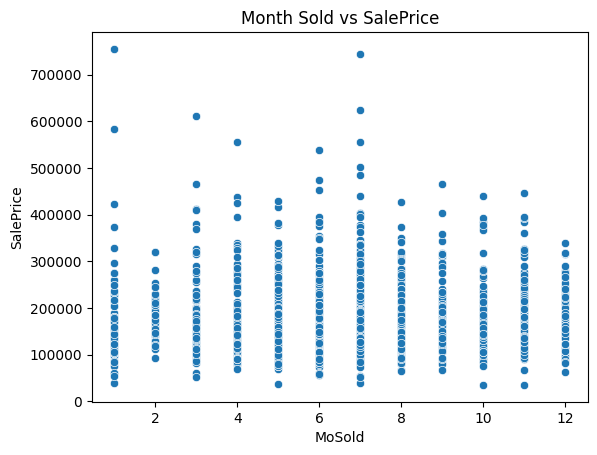

In [116]:
sns.scatterplot(data=train,x="MoSold",y="SalePrice",palette="viridis") 
plt.title("Month Sold vs SalePrice")
plt.show()

so it seems the sale price remains relatively the same throught months 

### FEATURE ENGINEERING

In [118]:
df=train.copy()

In [119]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [123]:
df["has_miscFeatures"]=np.where(df["MiscFeature"]=="None",0,1)

In [125]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: pd.Categorical(x).codes)

In [138]:
(df.corr())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,has_miscFeatures
Id,1.000000,0.010589,-0.006053,0.000775,-0.033170,0.008856,-0.002884,0.031361,-0.020008,0.013363,0.049164,0.006090,-0.015654,-0.003779,0.001874,0.022366,0.015957,-0.027553,0.013167,-0.013945,-0.023158,0.039229,-0.022448,-0.035514,-0.043685,0.051606,-0.039991,0.000989,0.029467,0.007640,0.048312,0.006886,-0.024980,0.015299,-0.004001,0.045553,-0.005668,-0.007508,-0.013815,0.042285,0.001878,0.009550,0.037344,0.011627,0.004885,-0.044139,0.008524,0.003158,-0.019917,0.004758,0.005494,0.037577,0.003177,-0.004003,0.026948,-0.001335,-0.018788,0.003848,-0.008110,0.013180,-0.002967,0.016254,0.018010,0.001623,-0.008698,0.005670,-0.029716,0.000267,0.003272,-0.046550,0.001617,0.057163,-0.034023,-0.000883,-0.037938,-0.006155,0.021708,0.000566,0.019458,-0.006031,-0.021756,-0.038178
MSSubClass,0.010589,1.000000,0.035921,-0.233099,-0.139766,-0.024995,0.099431,0.119043,-0.003058,-0.022836,0.075701,-0.025590,-0.006662,-0.024751,-0.042387,0.746337,0.397010,0.032936,-0.059134,0.027435,0.040199,-0.117654,-0.031293,-0.089463,-0.137551,-0.030000,0.015244,-0.017414,-0.003391,0.057833,-0.081507,-0.018029,-0.060833,0.005967,-0.069501,0.036902,-0.065549,-0.140627,-0.238160,0.048061,0.020663,-0.101886,0.051839,-0.251484,0.307713,0.046524,0.074949,0.003799,-0.002243,0.131354,0.177004,-0.023502,0.281833,0.010284,0.040274,0.003616,-0.045232,0.050233,0.133056,-0.081122,-0.028243,-0.040232,-0.098558,-0.038694,-0.046012,-0.060041,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.005245,0.086203,-0.046817,-0.007651,-0.013404,-0.021461,0.012348,-0.025021,-0.084230,-0.041767
MSZoning,-0.006053,0.035921,1.000000,-0.084302,-0.034454,0.087656,-0.368085,0.061923,-0.017845,-0.001193,-0.009877,-0.022062,-0.249898,-0.027875,0.044605,0.005678,-0.105406,-0.160159,0.186952,-0.309013,-0.174763,-0.000316,0.005129,-0.008537,0.006987,-0.028268,-0.062200,0.200587,-0.096034,-0.235204,0.160778,-0.011440,0.038138,0.026401,-0.049174,-0.033995,0.028078,-0.046765,-0.087953,0.056862,0.134291,-0.049516,-0.070811,-0.055669,-0.051468,0.011517,-0.082624,-0.018555,0.007185,-0.198308,-0.133907,-0.016466,0.049428,0.128971,-0.043192,-0.095716,-0.011382,-0.002494,0.141154,-0.073908,0.117610,-0.157038,-0.189269,-0.162994,-0.102738,-0.100360,-0.009475,-0.154752,0.115503,0.000359,0.019081,-0.003130,0.002884,-0.061279,-0.005559,0.009290,-0.031514,-0.020623,0.097450,0.009500,-0.166879,-0.003185
LotFrontage,0.000775,-0.233099,-0.084302,1.000000,0.261660,-0.023530,-0.036176,-0.356058,0.000454,0.046061,-0.259726,0.117426,0.041847,0.035037,0.028595,-0.277580,0.085885,0.109374,-0.014459,0.117034,0.017442,0.072882,0.071240,-0.008563,0.016871,-0.138333,0.137820,-0.068786,0.014800,0.076797,-0.042878,0.077822,-0.094045,-0.101001,0.160078,-0.043674,0.068316,-0.003619,0.187998,-0.038865,0.009371,0.103809,0.067590,0.243481,0.046821,-0.010422,0.216986,0.091221,0.020852,0.103555,0.080714,0.154285,-0.041924,-0.054249,0.169848,0.023308,0.245313,0.112884,-0.244412,0.110826,-0.110499,0.178458,0.198169,0.129498,0.099058,0.101076,0.120658,0.094891,-0.022949,0.058408,0.028669,0.062351,-0.062114,-0.040647,0.031594,0.065085,-0.006011,0.021650,0.005403,0.01

In [178]:
corr_matrix = df.corr()
high_corr_columns = corr_matrix['SalePrice'][(corr_matrix['SalePrice'].abs() > 0.5)].index.tolist()

if 'SalePrice' in high_corr_columns:
    high_corr_columns.remove("SalePrice")

In [179]:
X=df[high_corr_columns]

In [195]:
Y=train["SalePrice"]

In [196]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39       82000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
48      113000
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      18

In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [198]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [215]:
# y_test.squeeze()

In [216]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [202]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae=mean_absolute_error(y_test,y_pred)
mae

21492.03082023368

In [203]:
r2=r2_score(y_test,y_pred)
r2

0.849937192526961

### Random Forest Regressor and GradientBoostingRegressor

In [205]:
from sklearn.ensemble import RandomForestRegressor

In [296]:
first_model=RandomForestRegressor(n_estimators=300,random_state=42)
first_model.fit(X_train,y_train)
y_pred=first_model.predict(X_test)

In [297]:
mean_absolute_error(y_test,y_pred)

16730.163158295283

In [298]:
r2_score(y_test,y_pred)

0.8990775098946461

In [299]:
from sklearn.ensemble import GradientBoostingRegressor
second_model=GradientBoostingRegressor(n_estimators=300,random_state=42)
second_model.fit(X_train,y_train)
y_pred=second_model.predict(X_test)

In [300]:
mean_absolute_error(y_test,y_pred)

15243.951054759016

In [301]:
r2_score(y_test,y_pred)

0.9260322731109382

In [289]:
X = df.drop(columns=["SalePrice"])
y = train["SalePrice"]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [290]:
model=RandomForestRegressor(n_estimators=400,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [291]:
mean_absolute_error(y_test,y_pred)

16724.642368721463

In [292]:
r2_score(y_test,y_pred)

0.8982102864186379

In [302]:
second_model2=GradientBoostingRegressor(n_estimators=500,random_state=42)
second_model2.fit(X_train,y_train)
y_pred=second_model2.predict(X_test)

In [303]:
mean_absolute_error(y_test,y_pred)

15192.972651131477

In [304]:
r2_score(y_test,y_pred)

0.9267491158863573

Best model so far

## Trying Tuning

In [305]:
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_grid, 
    n_iter=100,  # Number of parameter settings sampled
    scoring='r2', cv=3, n_jobs=-1, random_state=42, verbose=2
)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best R^2 Score:", random_search.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best R^2 Score: 0.8435263387895385


In [251]:
param_grid = {
    'n_estimators': [50, 100, 150, 200,250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2,0.25]
}
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5, 
    scoring='r2',  
    verbose=2,
    n_jobs=-1  
)

In [252]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.25],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='r2', verbose=2)

In [253]:
y_pred=grid_search.predict(X_test)
mean_absolute_error(y_test,y_pred)

15251.379434883658

In [254]:
r2_score(y_test,y_pred)

0.9262935747837808

### XGBOOST

In [256]:
from xgboost import XGBRegressor

In [279]:
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=2, random_state=42)


In [280]:
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)


In [281]:
r2_score(y_test, y_pred)

0.9173733962474971

In [282]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
}

grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='r2',
                           verbose=2)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2

In [283]:
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=3,subsample=0.8, random_state=42)
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)



In [284]:
r2_score(y_test, y_pred)

0.9152091076588263

I decided to stick with the GradientBoostingRegressor because it achieved an R² score of 92.67% and a Mean Absolute Error (MAE) of 15,192.97, and here’s why:

Strong Model Performance: The R² score of 92.67% means that the model explains a large part of the variance in the target variable, which is excellent for a regression task. The MAE of 15,192.97 indicates the average error in predictions, and while it’s context-dependent, it’s a reasonable level for our needs, considering the scale of the target variable.

Comparison with Other Models: After testing several other models like RandomForestRegressor and XGBoost, I found that the GradientBoostingRegressor consistently performed the best in terms of both R² and MAE. Even after trying to tune these models with GridSearchCV, I didn’t see improvements; in fact, some models performed worse, like when the R² dropped to 84.35%.

Effort vs. Gain: I felt that trying to tune the model further or explore more complex models wouldn't yield significant improvements. The model’s performance is already strong enough to meet the project’s requirements, so spending more time and computational resources wouldn't be the best use of effort.

Model Stability: The GradientBoostingRegressor has been consistent across different data splits, meaning it generalizes well and isn’t overfitting. Plus, with a fixed random_state and 500 estimators, it’s stable and easy to reproduce, which makes it suitable for integration into production.

Deployability and Monitoring: Given the R² score of 92.67% and the acceptable MAE, this model is ready for deployment. After deployment, I can monitor its real-world performance and, if needed, retrain it based on new data to ensure it stays up-to-date with any trends.

In summary, the GradientBoostingRegressor strikes the best balance between accuracy, reliability, and computational efficiency for our project, so sticking with it makes the most sense.

#### Setting up the Test Set for prediction

In [364]:
test.shape

(1459, 80)

In [365]:
missing_values=test.isnull().sum()
missing_values_filtered = missing_values[missing_values > 0]
print(missing_values_filtered)

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [366]:
for column in ["SaleType", "Exterior1st", "Exterior2nd", "MSZoning", "KitchenQual", "Functional"]:
    mode_value = test[column].mode()[0] 
    test[column].fillna(mode_value, inplace=True)

In [367]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [368]:
for col in test.columns:
    if test[col].dtype=="object":
        test[col].fillna("None",inplace=True)

In [369]:
test['GarageYrBlt'].fillna(0, inplace=True)

In [370]:
for col in test.columns:
    if test[col].dtype=="float64":
        test[col].fillna("0",inplace=True)

In [371]:
missing_values=test.isnull().sum()
missing_values_filtered = missing_values[missing_values > 0]
print(missing_values_filtered)

Series([], dtype: int64)


In [372]:
test["has_miscFeatures"]=np.where(test["MiscFeature"]=="None",0,1)

In [373]:
test[test.select_dtypes(['object']).columns] = test.select_dtypes(['object']).apply(lambda x: pd.Categorical(x).codes)
X_test=test

In [374]:
y_pred_test=second_model.predict(X_test)
X_test["SalePrice"]=y_pred_test

In [375]:
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,has_miscFeatures,SalePrice
0,1461,20,2,56,11622,1,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0,3,4,1,4,4,3,5,227,3,31,172,202,0,4,1,3,896,0,0,896,0,0,1,0,2,1,3,5,6,0,3,1,1961.0,3,1,348,4,5,2,140,0,0,0,120,0,2,2,1,0,6,2010,8,4,0,114322.435238
1,1462,20,3,57,14267,1,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,58,3,4,1,4,4,3,0,478,6,0,275,477,0,4,1,3,1329,0,0,1329,0,0,1,1,3,1,2,6,6,0,3,1,1958.0,3,1,67,4,5,2,393,36,0,0,0,0,2,4,0,12500,6,2010,8,4,1,141935.059722
2,1463,60,3,50,13830,1,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0,3,4,2,2,4,3,2,417,6,0,70,234,0,2,1,3,928,701,0,1629,0,0,2,1,3,1,3,6,6,1,5,1,1997.0,0,2,179,4,5,2,212,34,0,0,0,0,2,2,1,0,3,2010,8,4,0,168950.077167
3,1464,60,3,54,9978,1,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,6,3,4,2,4,4,3,2,310,6,0,212,233,0,0,1,3,926,678,0,1604,0,0,2,1,3,1,2,7,6,1,2,1,1998.0,0,2,168,4,5,2,360,36,0,0,0,0,2,4,1,0,6,2010,8,4,0,177571.479196
4,1465,120,3,19,5005,1,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0,2,4,2,2,4,3,0,107,6,0,601,455,0,0,1,3,1280,0,0,1280,0,0,2,0,2,1,2,5,6,0,3,1,1992.0,2,2,198,4,5,2,0,82,0,0,144,0,2,4,1,0,1,2010,8,4,0,163606.394924


In [376]:
new=X_test[["Id","SalePrice"]]

In [377]:
new.shape

(1459, 2)

In [378]:
new.to_csv("newly_predicted2.csv",index=False)